# Analiza kategorii w sklepie euro.com.pl

## 1. Wprowadzenie

<h4>Cel analizy</h4>
<p>
Analiza ma na celu poznanie dostępnych kategorii w sklepie internetowym euro.com.pl należącego do sieci sklepów RTVeuroAGD.
Dowiedzmy się, czy sklep RTVeuroAGD jest bardziej RTV, czy AGD, a może dominują produkty z nietytułowych kategorii. Wnioski z analizy będą pomocne przy analizowaniu promocji, cyklicznie pojawiających się w tym sklepie.
<p>
<h4>Pochodzenie zbioru danych</h4>
<p>
    Dane z analizowanego pliku pochodzą ze sklepu internetowego euro.com.pl. Zostały zebrane w dniu 31.01.2022 r. W tym celu posłużyłem się skryptem scrapującym napisanym w Pythonie. Kod źródłowy wykorzystanego skryptu oraz plik z zebranymi danymi znajduje się w folderze 'categories' tego repozytorium.
</p>

## 2. Wczytanie potrzebnych bibliotek

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## 3. Wczytanie zbioru z danymi

In [20]:
df = pd.read_csv('./categories/categories.csv', header=0)

### 3.1 Przegląd zbioru.

In [21]:
print(f'Zbiór zawiera {df.shape[0]} obserwacji oraz {df.shape[1]} zmiennych.')

Zbiór zawiera 496 obserwacji oraz 4 zmiennych.


In [22]:
print(f'Dostępne zmienne: {df.columns.tolist()}')

Dostępne zmienne: ['parent_category', 'category', 'link_to_category', 'offers_count']


In [23]:
print(f'Typy zmiennych:')
df.dtypes

Typy zmiennych:


parent_category      object
category             object
link_to_category     object
offers_count        float64
dtype: object

In [24]:
print(f'Zbior zawiera {len(df.parent_category.unique())} kategorii głównych:\n{df.parent_category.unique()}')

Zbior zawiera 7 kategorii głównych:
['agd' 'agd-do-zabudowy' 'agd-male' 'rtv' 'telefony-i-nawigacja-gps'
 'komputery' 'gry-i-konsole']


In [25]:
print(f'Zbior zawiera {len(df.category.unique())} kategorii podrzędnych.')

Zbior zawiera 424 kategorii podrzędnych.


## 4. Analiza zbioru

### 4.1 Analiza kategorii głównych

In [44]:
parent_categories_summary = df.groupby(['parent_category']).agg(offers_count=('offers_count','sum'), categories_count=('category', 'count'))
parent_categories_summary = parent_categories_summary.sort_values(by='offers_count', ascending=False)
parent_categories_summary = parent_categories_summary.reset_index()
parent_categories_summary

,parent_category,offers_count,categories_count
0,komputery,10348.0,100
1,telefony-i-nawigacja-gps,9838.0,48
2,agd-male,8724.0,159
3,rtv,6335.0,74
4,agd-do-zabudowy,5993.0,40
5,agd,5914.0,39
6,gry-i-konsole,3367.0,36


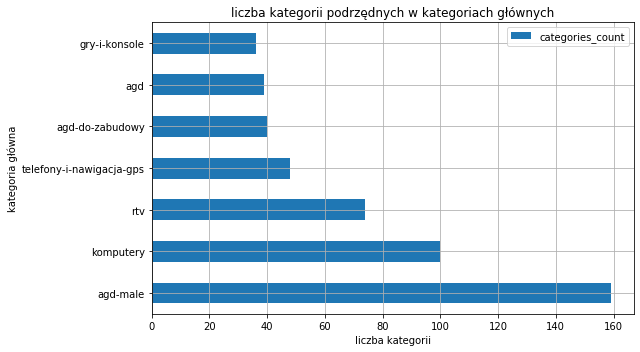

In [68]:
parent_categories_summary[['parent_category','categories_count']].set_index('parent_category').sort_values(by='categories_count', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba kategorii podrzędnych w kategoriach głównych')
plt.xlabel('liczba kategorii')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba kategorii podrzędnych w kategoriach głównych.png')
plt.show()

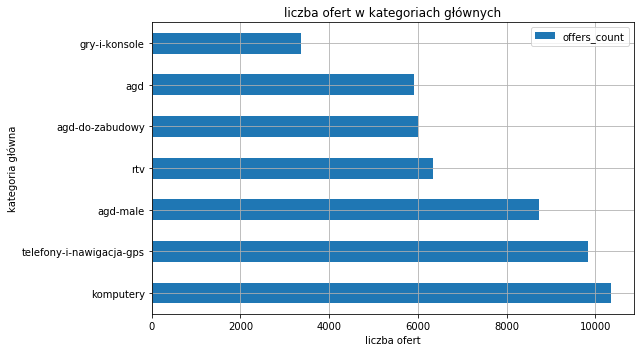

In [67]:
parent_categories_summary[['parent_category','offers_count']].set_index('parent_category').sort_values(by='offers_count', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba ofert w kategoriach głównych')
plt.xlabel('liczba ofert')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba ofert w kategoriach głównych.png')
plt.show()

### 4.2 Analiza kategorii podrzędnych

In [31]:
categories_summary = df.set_index('category').groupby('parent_category').offers_count.nlargest(3)
print('Top 3 najwiekszych kategorii podrzędnych po kategoriach głównych:')
categories_summary

Top 3 najwiekszych kategorii podrzędnych po kategoriach głównych:


parent_category           category                   
agd                       zlewozmywaki                   1676.0
                          okapy                           700.0
                          baterie-kuchenne                654.0
agd-do-zabudowy           zlewozmywaki                   1676.0
                          okapy                           700.0
                          baterie-kuchenne                654.0
agd-male                  kawy                            391.0
                          czajniki                        382.0
                          patelnie                        321.0
gry-i-konsole             myszy                           638.0
                          sluchawki-dla-graczy-pc         448.0
                          klawiatury                      281.0
komputery                 laptopy-i-netbooki              779.0
                          monitory-led-i-lcd              722.0
                          myszy                   